In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# read the data:
df=pd.read_csv('height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


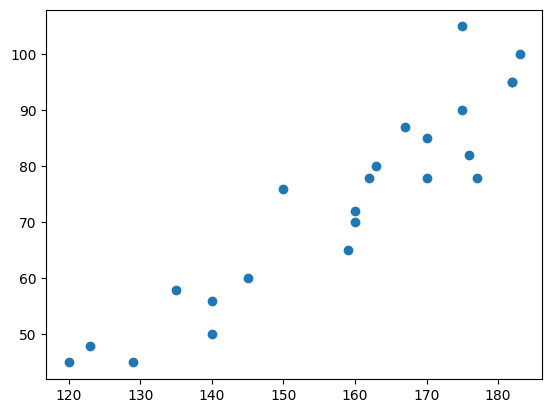

In [6]:
plt.scatter(df.Height,df.Weight)

In [8]:
# divide the data int x,y:
x=df['Weight']
y=df['Height']

In [9]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [10]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [11]:
# train_test-split:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [13]:
y_train

,Height
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177
22,160


In [15]:
# scaling:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [21]:
new_x_train=scaler.fit_transform(x_train.values.reshape(-1,1))
new_x_test=scaler.transform(x_test.values.reshape(-1,1))

In [23]:
new_x_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [24]:
new_x_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [25]:
# model_training:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [27]:
reg.fit(new_x_train,y_train)

LinearRegression()

In [29]:
print('coef is',reg.coef_)
print('intercept is ',reg.intercept_)

coef is [17.96866211]
intercept is  159.0


In [32]:
reg.predict(new_x_train)

array([152.96309227, 129.08678304, 159.47481297, 163.8159601 ,
       174.66882793, 139.93965087, 169.24239401, 125.83092269,
       161.64538653, 155.13366584, 137.76907731, 161.64538653,
       180.09526185, 190.94812968, 180.09526185, 161.64538653])

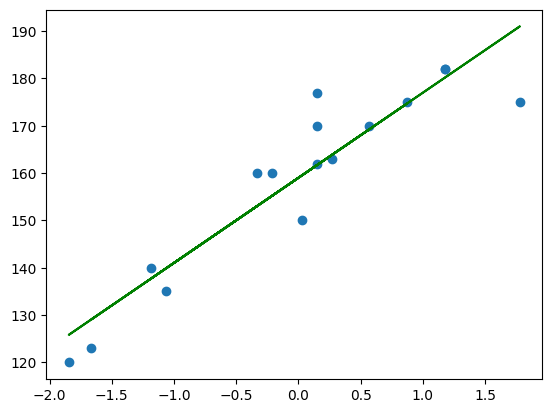

In [34]:
plt.scatter(new_x_train,y_train)
plt.plot(new_x_train,reg.predict(new_x_train),color='green')

In [37]:
y_pred_test=reg.predict(new_x_test)
y_pred_test

array([125.83092269, 147.53665835, 142.11022444, 185.52169576,
       171.41296758, 131.25735661, 165.98653367])

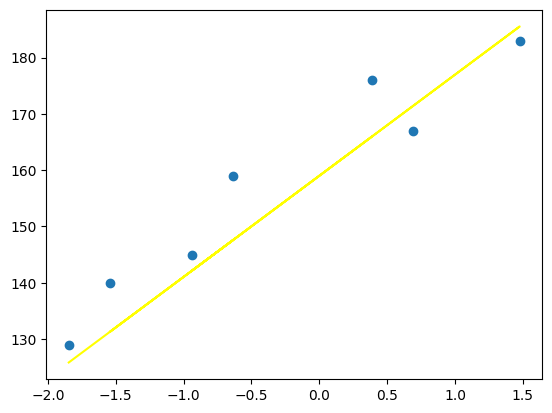

In [36]:

plt.scatter(new_x_test,y_test)
plt.plot(new_x_test,y_pred_test,color='yellow')

In [38]:
# evoluation_matrix:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mean_squared_error(y_test,y_pred_test)

50.33408704814381

In [40]:
mean_absolute_error(y_test,y_pred_test)

6.173281083006771

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

7.09465200331516

In [42]:
r2_score(y_test,y_pred_test) # 85% of y is explaned by x

0.850577349729853

In [43]:
score=r2_score(y_test,y_pred_test)

In [48]:
new_x_test.shape[1]

1

In [51]:
# adj_rsquare:
1-(1-score)*(len(y_test)-1)/ (len(y_test)- new_x_test.shape[1]-1)

0.8206928196758236